Atalov S. (TSI AUCA)


# Lab 1. Residual Networks


---

<div>
    <img src="https://i.imgur.com/2D5ryhc.png" width="500">
</div>

In [ ]:
import h5py
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform

# 1. ResNet

## 1.1. The Identity Block

The identity block is the standard block used in ResNets, and corresponds to the case where the input activation (say $a^{[l]}$) has the same dimension as the output activation (say $a^{[l+2]}$). To flesh out the different steps of what happens in a ResNet's identity block, here is an alternative diagram showing the individual steps:

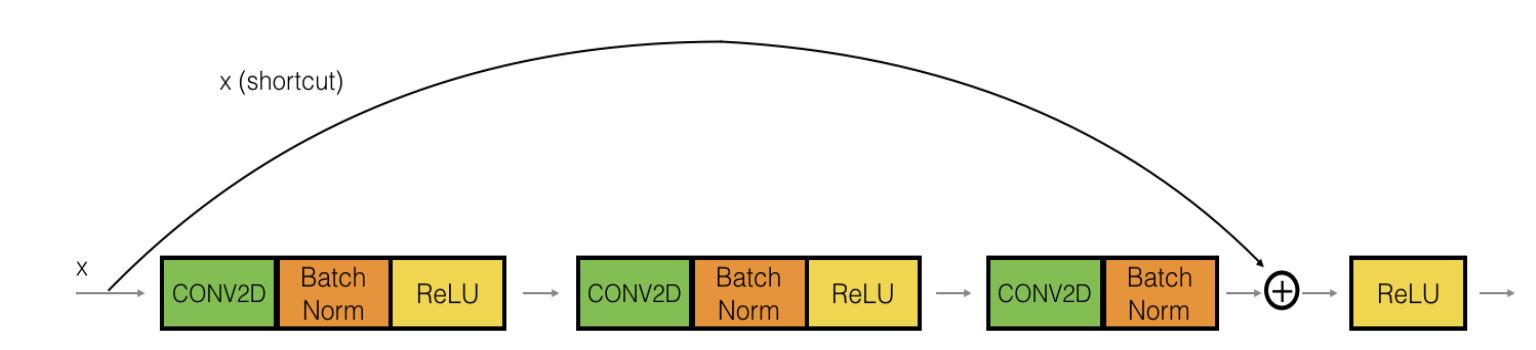

The upper path is the "shortcut path." The lower path is the "main path." In this diagram, notice the CONV2D and ReLU steps in each layer. To speed up training, a BatchNorm step has been added. Don't worry about this being complicated to implement--you'll see that BatchNorm is just one line of code in Keras!

These are the individual steps:

First component of main path: 
- The first CONV2D has $F_1$ filters of shape (1,1) and a stride of (1,1). Its padding is "valid". Random uniform initialization: `kernel_initializer = initializer()`. 
- The first BatchNorm is normalizing the 'channels' axis.
- Then apply the ReLU activation function. This has no hyperparameters. 

Second component of main path:
- The second CONV2D has $F_2$ filters of shape $(3,3)$ and a stride of (1,1). Its padding is "same". Random uniform initialization: `kernel_initializer = initializer()`.
- The second BatchNorm is normalizing the 'channels' axis.
- Then apply the ReLU activation function. This has no hyperparameters.

Third component of main path:
- The third CONV2D has $F_3$ filters of shape (1,1) and a stride of (1,1). Its padding is "valid". Random uniform initialization: `kernel_initializer = initializer()`. 
- The third BatchNorm is normalizing the 'channels' axis.
- Note that there is **no** ReLU activation function in this component. 

Final step: 
- The `X_shortcut` and the output from the 3rd layer `X` are added together.
- **Hint**: The syntax will look something like `Add()([var1,var2])`
- Then apply the ReLU activation function. This has no hyperparameters. 

In [ ]:
def identity_block(X, filters, training=True, initializer=random_uniform):
    """
    Implementation of the identity block as defined in the Figure above
    
    Arguments:
    X -- input tensor
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    training -- True: Behave in training mode
                False: Behave in inference mode
    initializer -- to set up the initial weights of a layer. Equals to random uniform initializer
    
    Returns:
    X -- output of the identity block
    """
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer())(X)
    X = BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = Activation('relu')(X)
    
    ## Second component of main path
    ## Set the padding = 'same'
    X = 
    X = 
    X = 

    ## Third component of main path
    ## Set the padding = 'valid'
    ## Note that there is no ReLU activation function in this component.
    X = 
    X = 
    
    ## Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X_shortcut, X])
    X = 

    return X

## 1.2. The Convolutional Block

The ResNet "convolutional block" is the second block type. You can use this type of block when the input and output dimensions don't match up. The difference with the identity block is that there is a CONV2D layer in the shortcut path:

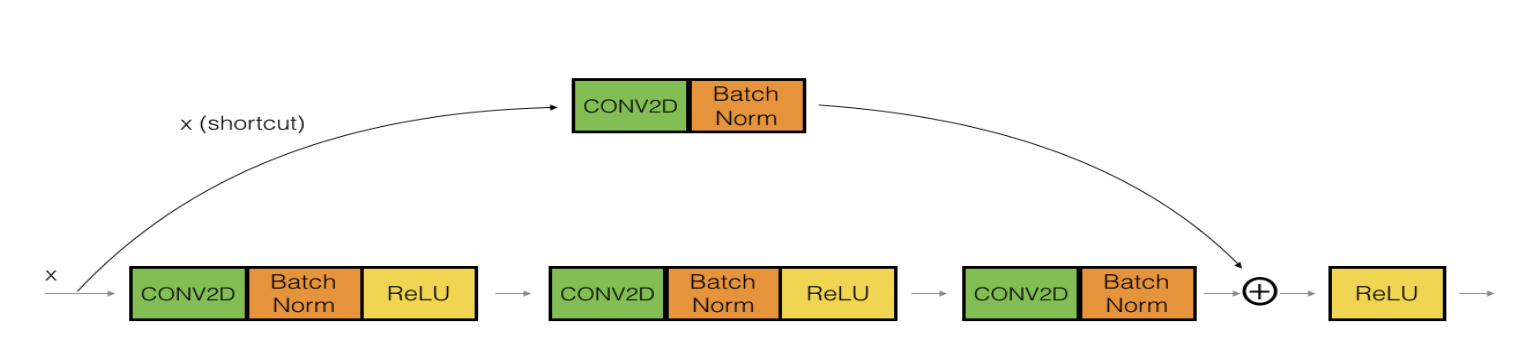

The details of the convolutional block are as follows. 

First component of main path:
- The first CONV2D has $F_1$ filters of shape (1,1) and a stride of (s,s). Its padding is "valid". Use the `glorot_uniform` `kernel_initializer = initializer()`.
- The first BatchNorm is normalizing the 'channels' axis.
- Then apply the ReLU activation function. This has no hyperparameters. 

Second component of main path:
- The second CONV2D has $F_2$ filters of shape (3, 3) and a stride of (1,1). Its padding is "same".  Use the `glorot_uniform` `kernel_initializer = initializer()`.
- The second BatchNorm is normalizing the 'channels' axis.
- Then apply the ReLU activation function. This has no hyperparameters. 

Third component of main path:
- The third CONV2D has $F_3$ filters of shape (1,1) and a stride of (1,1). Its padding is "valid".  Use the `glorot_uniform` `kernel_initializer = initializer()`.
- The third BatchNorm is normalizing the 'channels' axis. Note that there is no ReLU activation function in this component. 

Shortcut path:
- The CONV2D has $F_3$ filters of shape (1,1) and a stride of (s,s). Its padding is "valid".  Use the `glorot_uniform` `kernel_initializer = initializer()`.
- The BatchNorm is normalizing the 'channels' axis. 

Final step: 
- The shortcut and the main path values are added together.
- Then apply the ReLU activation function. This has no hyperparameters. 

In [ ]:
def convolutional_block(X, filters, s = 2, training=True, initializer=glorot_uniform):
    """
    Implementation of the convolutional block as defined in the Figure above
    
    Arguments:
    X -- input tensor
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    s -- Integer, specifying the stride to be used
    training -- True: Behave in training mode
                False: Behave in inference mode
    initializer -- to set up the initial weights of a layer. Equals to Glorot uniform initializer, 
                   also called Xavier uniform initializer.
    
    Returns:
    X -- output of the convolutional block
    """
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    
    # First component of main path glorot_uniform(seed=0)
    X = Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer())(X)
    X = BatchNormalization(axis = 3)(X, training=training)
    X = Activation('relu')(X)
    
    ## Second component of main path
    X = 
    X = 
    X = 

    ## Third component of main path
    X = 
    X = 
    
    
    
    ##### SHORTCUT PATH ##### 
    X_shortcut = 
    X_shortcut = 
    
    ### END CODE HERE

    # Final step: Add shortcut value to main path (Use this order [X, X_shortcut]), and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = 
    
    return X

## 1.3. ResNet50 (50 layers)

<div>
    <img src="https://jananisbabu.github.io/ResNet50_From_Scratch_Tensorflow/images/resnet50.png">
</div>

The details of this ResNet-50 model are:
- Zero-padding pads the input with a pad of (3,3)
- Stage 1:
    - The 2D Convolution has 64 filters of shape (7,7) and uses a stride of (2,2). 
    - BatchNorm is applied to the 'channels' axis of the input.
    - ReLU activation is applied.
    - MaxPooling uses a (3,3) window and a (2,2) stride.
- Stage 2:
    - The convolutional block uses three sets of filters of size [64,64,256] and "s" is 1.
    - The 2 identity blocks use three sets of filters of size [64,64,256],.
- Stage 3:
    - The convolutional block uses three sets of filters of size [128,128,512] and "s" is 2.
    - The 3 identity blocks use three sets of filters of size [128,128,512].
- Stage 4:
    - The convolutional block uses three sets of filters of size [256, 256, 1024] and "s" is 2.
    - The 5 identity blocks use three sets of filters of size [256, 256, 1024].
- Stage 5:
    - The convolutional block uses three sets of filters of size [512, 512, 2048] and "s" is 2.
    - The 2 identity blocks use three sets of filters of size [512, 512, 2048].
- The 2D Average Pooling uses a window of shape (2,2).
- The 'flatten' layer doesn't have any hyperparameters.
- The Fully Connected (Dense) layer reduces its input to the number of classes using a softmax activation.

In [ ]:
def ResNet50(input_shape = (64, 64, 3), classes = 6):
    """
    Stage-wise implementation of the architecture of the popular ResNet50:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> FLATTEN -> DENSE 

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    ## Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    ## Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    ## Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    ## Stage 2
    X = convolutional_block(X, filters = [64, 64, 256], s = 1)
    X = identity_block(X, filters=[64, 64, 256])
    X = identity_block(X, filters=[64, 64, 256])

    ## Stage 3

    
    
    ## Stage 4

    

    ## Stage 5

    

    ## AVGPOOL. Use "X = AveragePooling2D(...)(X)"
    


    ## output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform())(X)
    
    
    # Create model
    model = tf.keras.Model(inputs = X_input, outputs = X)

    return model

In [ ]:
model = ResNet50(input_shape = (64, 64, 3), classes = 6)
print(model.summary())

---
# 2. Training the ResNet

## 2.1. Dataset

In [ ]:
def load_signs_dataset():
    train_dataset = h5py.File('./datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('./datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

# Normalize image vectors
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(32)

## 2.2. Fitting the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset)

## 2.3. Results

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy');

In [ ]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

## 2.4. Test on own images

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
my_test_images = []

NUM_OF_IMAGES = 7
IMAGE_SIZE = (64, 64)

plt.figure(figsize=(16, 10))

for i in range(NUM_OF_IMAGES):
    # read file
    img = Image.open(f"./test/myimg{i}.jpg").resize(IMAGE_SIZE, Image.LANCZOS)
    
    # normalize
    img = np.array(img)/255.
    
    my_test_images.append(img)
    ax = plt.subplot(1, NUM_OF_IMAGES, i + 1)
    plt.imshow(my_test_images[i])
    
my_test_images = np.array(my_test_images)

In [ ]:
my_test_dataset = tf.data.Dataset.from_tensor_slices(my_test_images).batch(NUM_OF_IMAGES)

In [ ]:
y_pred = np.argmax(model.predict(my_test_dataset), axis=1)

In [ ]:
plt.figure(figsize=(16, 10))

for i in range(NUM_OF_IMAGES):
    ax = plt.subplot(1, NUM_OF_IMAGES, i + 1)
    
    plt.imshow(my_test_images[i])
    
    plt.title(y_pred[i])
    plt.axis("off")